<a href="https://colab.research.google.com/github/reedmarohn/lab-1-phase-2-reedmarohn/blob/main/DATA_301_Lab_1A_Reed_Marohn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

Given that there is no 0 involved in the first digits, that means that you will be only working with 1 through 9. This means that 1/9 of all numbers will start with a first digit of 1, and 1/9 of all numbers will have a first digit with 9. This is no different when thinking of the last digits compared to the first, just a different column.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500 = df_sp500.set_index(["Name"])
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


The unit of observation of this dataset is the names of the S&P 500 companies. The name is also the best variable for the index because the name is never repeated on the list so its able to uniquely identify all S&P 500 companies.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

1    0.326733
2    0.184158
3    0.116832
4    0.085149
5    0.081188
6    0.071287
7    0.049505
8    0.043564
9    0.041584
Name: firstdigit, dtype: float64

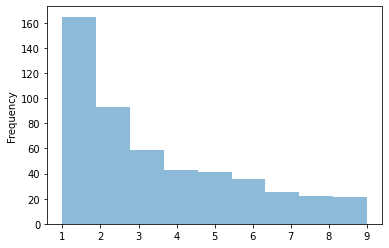

In [ ]:
df_sp500["volume"] = df_sp500["volume"].astype(str)
df_sp500["volume"]
df_sp500["firstdigit"] = df_sp500["volume"].str[0]
df_sp500["firstdigit"] = df_sp500["firstdigit"].astype(int)
df_sp500["firstdigit"].plot.hist(alpha = 0.5, bins = 9)
df_sp500["firstdigit"].value_counts(normalize=True)


Very large difference from the results of Question 2 compared to the prediction made in Question 0.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

8    61
2    61
1    61
6    60
9    59
7    57
3    56
5    47
4    43
Name: lastdigit, dtype: int64

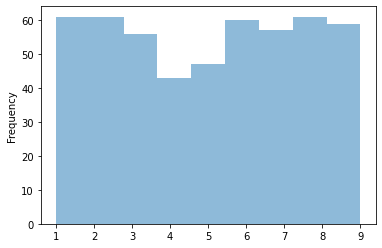

In [ ]:
# ENTER YOUR CODE HERE.df_sp500["volume"] = df_sp500["volume"].astype(str)
df_sp500["volume"] = df_sp500.volume.str.strip().str.replace("0", "").str.replace(".", "")
df_sp500["lastdigit"] = df_sp500["volume"].str[-1:]
df_sp500["lastdigit"] = df_sp500["lastdigit"].astype(int)
df_sp500["lastdigit"].plot.hist(alpha = 0.5, bins = 9)
df_sp500["lastdigit"].value_counts()



Question 3 is way more in-line with the prediction made in Question 0.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    0.338614
2    0.108911
3    0.102970
6    0.095050
7    0.085149
4    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: firstdigit, dtype: float64

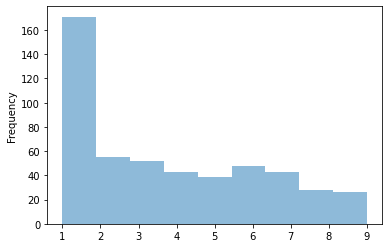

In [ ]:
df_sp500["close"] = df_sp500["close"].astype(str)
df_sp500["close"]
df_sp500["firstdigit"] = df_sp500["close"].str[1]
df_sp500["firstdigit"] = df_sp500["firstdigit"].astype(int)
df_sp500["firstdigit"].plot.hist(alpha = 0.5, bins = 9)
df_sp500["firstdigit"].value_counts(normalize=True)

Question 4 histogram has a very similar distribution to Question 2. I think that this means that there is a bias in first digits to be 1 in most numbers and is hard to change (due to needing to increment by more than 1 to shift), meanwhile being a last digit has no bias and can change fluidly with any random small increment.